In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split


from tqdm import tqdm

import groups_of_features
from groups_of_features import _frontal, _central, _parietal, _alpha, _theta, _beta, _low_gamma, _high_gamma

plt.rcParams.update({
    'mathtext.fontset': 'cm',
    'font.family': 'STIXGeneral',
    'axes.xmargin': 0,
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'axes.labelsize': 14,
    "axes.titlesize": 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlepad': 20,
    'grid.linewidth': 0.35,
    "grid.color": "grey"
})

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

c:\Users\scbui\OneDrive\Documents\Master_BMS_PSN\Research_project_2_Unravel\Python\Random_forest\groups_of_features.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_csv("../features_tweaked.csv")


In [2]:
features = pd.read_csv("../features_tweaked.csv")

C:\Users\scbui\AppData\Local\Temp\ipykernel_460\1846429560.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_csv("../features_tweaked.csv")


In [3]:
metadata_columns = ['Respondent', 'Participant_ID', 'mean_rating', 'Participant_ID_short',
       'image_number', 'individual_ratings', 'ID', 'Type', "class", "Missing"]


X = features.drop(metadata_columns, axis = 1)
y = features["class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_model(X_train_scaled, y_train, X_test_scaled, y_test, _est):
    model = RandomForestClassifier(max_samples= X_train_scaled.shape[0], n_estimators=_est, 
                                   max_leaf_nodes=1000, n_jobs=-1)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy, y_pred


In [14]:
ACC_mean = []
ACC_all = []
stds = []
y_predict = []

estimators = np.linspace(1, 250, 40, dtype= int)

for _est in estimators:
    print(f"Training model for $_est = {_est}$")
    temp_ACC = []
    for i in range(3):
        model, accuracy, y_pred = train_model(X_train_scaled, y_train, X_test_scaled, y_test, _est)
        temp_ACC.append(accuracy)
    y_predict.append(y_pred)
    ACC_all.append(temp_ACC)
    ACC_mean.append(np.mean(temp_ACC))
    stds.append(np.std(temp_ACC))

print(f"Model total performance: {ACC_mean} +- {stds}")

Training model for $_est = 1$
Training model for $_est = 7$
Training model for $_est = 13$
Training model for $_est = 20$
Training model for $_est = 26$
Training model for $_est = 32$
Training model for $_est = 39$
Training model for $_est = 45$
Training model for $_est = 52$
Training model for $_est = 58$
Training model for $_est = 64$
Training model for $_est = 71$
Training model for $_est = 77$
Training model for $_est = 84$
Training model for $_est = 90$
Training model for $_est = 96$
Training model for $_est = 103$
Training model for $_est = 109$
Training model for $_est = 115$
Training model for $_est = 122$
Training model for $_est = 128$
Training model for $_est = 135$
Training model for $_est = 141$
Training model for $_est = 147$
Training model for $_est = 154$
Training model for $_est = 160$
Training model for $_est = 167$
Training model for $_est = 173$
Training model for $_est = 179$
Training model for $_est = 186$
Training model for $_est = 192$
Training model for $_est =

In [3]:
all_estimators = np.load("Estimators_ACC_all.npy")
ACC_mean = np.load("Estimators_ACC_mean.npy")
stds = np.load("Estimators_ACC_stds.npy")
estimators = np.load("Estimators_estimators.npy")

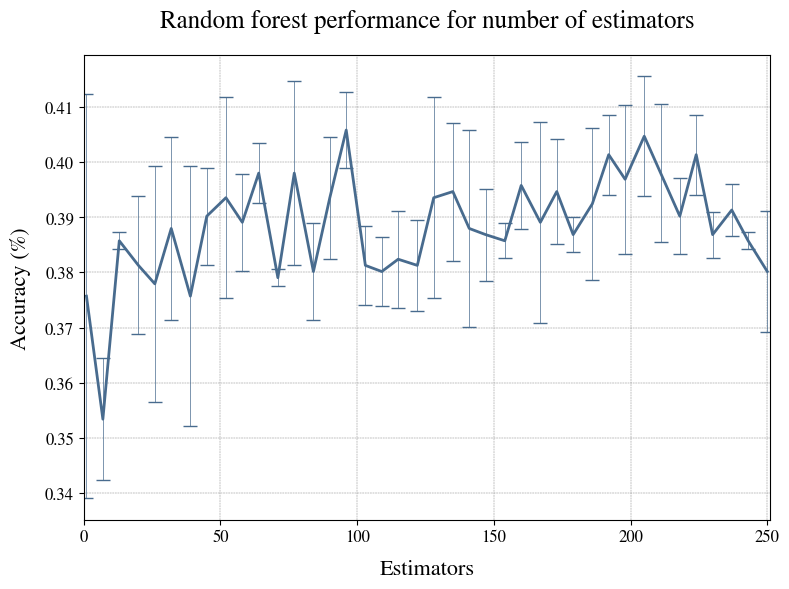

In [9]:
plt.figure(figsize=(8, 6))

# Plot accuracy and standard deviations
plt.errorbar(estimators, ACC_mean, stds, fmt = "none", capsize = 5, linewidth = 0.5, color="#486B8E") 
plt.plot(estimators, ACC_mean, marker = "", color='#486B8E', linewidth=2, label = "Accuracy")

plt.xlim(0, 251)
plt.xlabel("Estimators", labelpad = 10, fontsize = 16)
plt.ylabel("Accuracy (%)", labelpad = 10, fontsize = 16)
plt.title("Random forest performance for number of estimators", fontsize = 18)
plt.grid(True)


# Adjust layout
plt.tight_layout()

# Save and show the plot
plt.savefig("RF_estimators_sweep.pdf", format='pdf', bbox_inches='tight')
plt.show()


Dus beste performance op 96 for some reason
